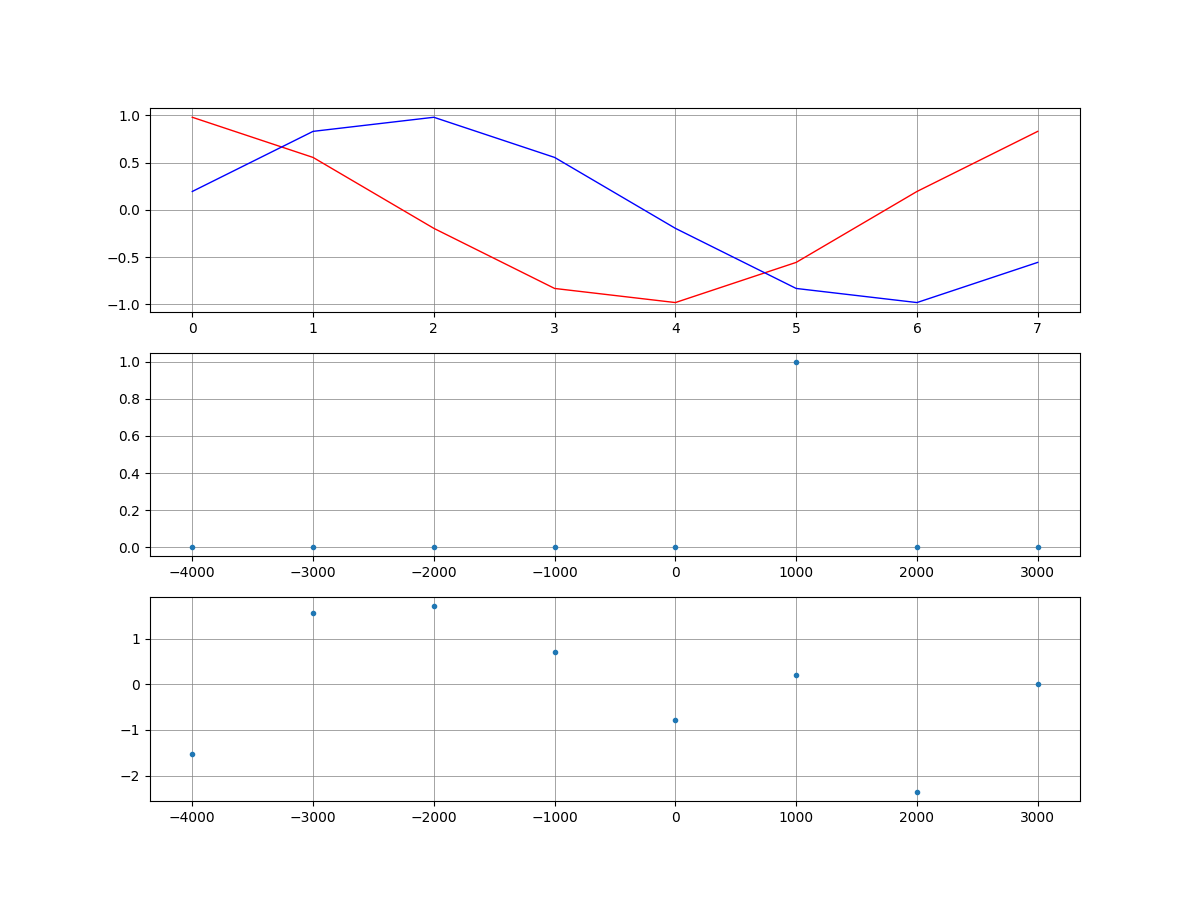

In [1]:
# пример ДФТ

import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget

plt.rcParams.update({
        "grid.color": "0.5",    # gray gridlines
        "grid.linestyle": "-",  # solid gridlines
        "grid.linewidth": 0.5,  # thin gridlines
        "lines.linewidth": 1,
        "savefig.dpi": 300,     # higher resolution output.
})

Fs = 8000  # частота дискретизации
F1 = 1000  # частота первой гармоники
F2 = 2000  # частота второй гармоники
N = 8     # число анализируемых отсчетов

dF1 = F1/Fs                     # набег фазы за один отсчет (Гц/отсчет)
dF1rad = 2*np.pi*dF1            # набег фазы за один отсчет (Рад/отсчет)
dF1deg = dF1rad*360/(2*np.pi)   # набег фазы за один отсчет (град/отсчет)

dF2 = F2/Fs                     # набег фазы за один отсчет (Гц/отсчет)
dF2rad = 2*np.pi*dF2            # набег фазы за один отсчет (Рад/отсчет)

n = np.asarray(range(N))        # последовательность отсчетов
# x = np.exp(1j*dF1rad*n) + 0.5*np.exp(1j*(dF2rad*n+1/4*np.pi))    # двухчастотный сигнал
x = np.exp(1j*(dF1rad*n + np.pi/16))

fig, (plt1, plt2, plt3) = plt.subplots(3, 1)
fig.set_size_inches(12, 9)
plt1.grid(True)
plt2.grid(True)
plt3.grid(True)

dft_dNrad = 2*np.pi/N    # набег фазы на один отсчет относительно одной гармоники
dft_dN = Fs/N            # основная частота гармоник (Гц на гармонику)

m = np.asarray(range(N))  # последовательность гармоник
nm = n[np.newaxis, :]*m[:, np.newaxis]

# Модулирующие гармонические последовательности.
# Если гармоники действительные, то они должны быть синфазны с сигналом,
# т.е. если сигнал sin(2*pi*f*n) с начальной фазой 0, то такими же должны быть
# и гармоники, чтобы получить корреляционный отклик на свертке с сигналом.
# Если сигнал sin(2*pi*f*n + ph) с ненулевой начальной фазой, то гармоники
# должны быть с такой же начальной фазой.
# В общем случае гармоники комплексные, фаза сигнала проецируется
# и на синфазную, и на квадратурную составляющие модулирующих гармоник,
# а комплексная свертка несет информацию как об амплитуде, так и о
# начальной фазе соответствующей гармонической составляющей сигнала.
# Гармоники, на которых появляется корреляционный отклик, крутятся в другую
# сторону относительно сигнала, т.е. имеют противоположную частоту
# Модулирующие гармоники дискретизированы с частотой Fs
dft_array = np.exp(-1j*dft_dNrad*nm)

# dft_array[0] - постоянная составляющая
# dft_array[1] - гармоника Fs/N
# dft_array[2] - гармоника 2*Fs/N
# dft_array[N-1] - гармоника (N-1)*Fs/N
# гармоники dft_array[N-i] - такие же, что и dft_array[i],
# но с обратным вращением вектора, т.е. с положительной частотой
# поэтому для построения комплексного спектра необходимо
# отсчеты [N/2, N-1] сдвинуть на -N, т.е. перенести в область [N/2-N,-1]

# Если сигнал действительный, то он будет коррелировать одинаково
# с гармониками dft_array[i] и dft_array[-i], т.к. направление
# вращения комплексного вектора не задано и оно может быть как
# как положительным, так и отрицательным.
# Если сигнал комплексный, то направление вращения вектора в фазовом
# пространстве задано. Сигнал будет коррелировать только с одной из
# сопряженных гармоник: dft_array[i] или dft_array[-i], с направлением
# вращения которой совпадает вращение вектора сигнала.

# Свертка с нулевой гармоникой представляет собой сумму, т.е. усреднение
# отсчетов сигнала, что дает постоянную составляющую

# Гармоники dft_array задаются с нулевой начальной фазой
# При модуляции отсчетов коррелирующими гармониками, каждый
# модулированный отсчет совпадает по фазе с начальной фазой сигнала

# счначала модулируем сигнал всеми гармониками
dft_modulation = dft_array*x
# расчет спектральных составляющих как свертка сигнала с гармониками.
# т.к. свертка зависит от N, то она нормируется относительно N
dft_transform = np.sum(dft_modulation, axis=1)/N
# расчет амплитудного спектра
dft_ampl = np.absolute(dft_transform)
# расчет энергетического спектра
dft_pwr = np.square(dft_ampl)
# расчет фазового спектра
dft_phase = np.angle(dft_transform)
# сдвигаем половину спектра в область отрицательных частот
dft_ampl_shift = np.concatenate((dft_ampl[int(N/2):N], dft_ampl[0:int(N/2)]))
dft_pwr_shift = np.concatenate((dft_pwr[int(N/2):N], dft_pwr[0:int(N/2)]))
dft_phase_shift = np.concatenate((dft_phase[int(N/2):N], dft_phase[0:int(N/2)]))

# строим частотный ряд для отображения спектра
freq_array = (m-int(N/2))*dft_dN
ampl_spectrum = np.column_stack((freq_array, dft_ampl_shift))
pwr_spectrum = np.column_stack((freq_array, dft_pwr_shift))
phase_spectrum = np.column_stack((freq_array, dft_phase_shift))

plt1.plot(np.real(x), 'r')
plt1.plot(np.imag(x), 'b')
plt2.plot(ampl_spectrum[:, 0], ampl_spectrum[:, 1], '.')
plt3.plot(phase_spectrum[:, 0], phase_spectrum[:, 1], '.')

np.set_printoptions(precision=5, suppress=True, linewidth=200)